In [1]:
#perfusion response signature analysis
project_dir = "~/ben_lustre/current_projects/kidney_glomTI_response"
setwd(project_dir)
suppressPackageStartupMessages(source("https://raw.githubusercontent.com/bjstewart1/helpful_singlecell/main/functions.R"))
ad <- import("anndata")
sc <- import("scanpy")
sp = import("scipy")
library(igraph)
library(ggraph)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [2]:
library(clusterProfiler)
library(msigdbr)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [3]:
#get DE genes and do GSEA
deg = read.csv('./data/da_results/perfusion/response_signatures/GEC_differential_expression.csv')
#tweak so we are only look at stuff that really is convincingly de
deg$real = unlist(lapply(1:nrow(deg),  function(x){
    x = deg[x, ]
    nzp1 = x$non_zeros_proportion1
    nzp2 = x$non_zeros_proportion2
    nzp = max(c(nzp1, nzp2)) > 0.2
    rwm1 = x$raw_mean1 
    rwm2 = x$raw_mean2
    rwm =  max(c(rwm1, rwm2)) > 0.1
    nzp & rwm
}))
deg= deg[deg$real, ]

In [4]:
#deg$score = sign(deg$lfc_mean)*(-log10(deg$proba_not_de)) #get a score based on the DE probability and sign
deg$score = deg$lfc_mean
deg = deg[order(deg$score, decreasing = TRUE), ]

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



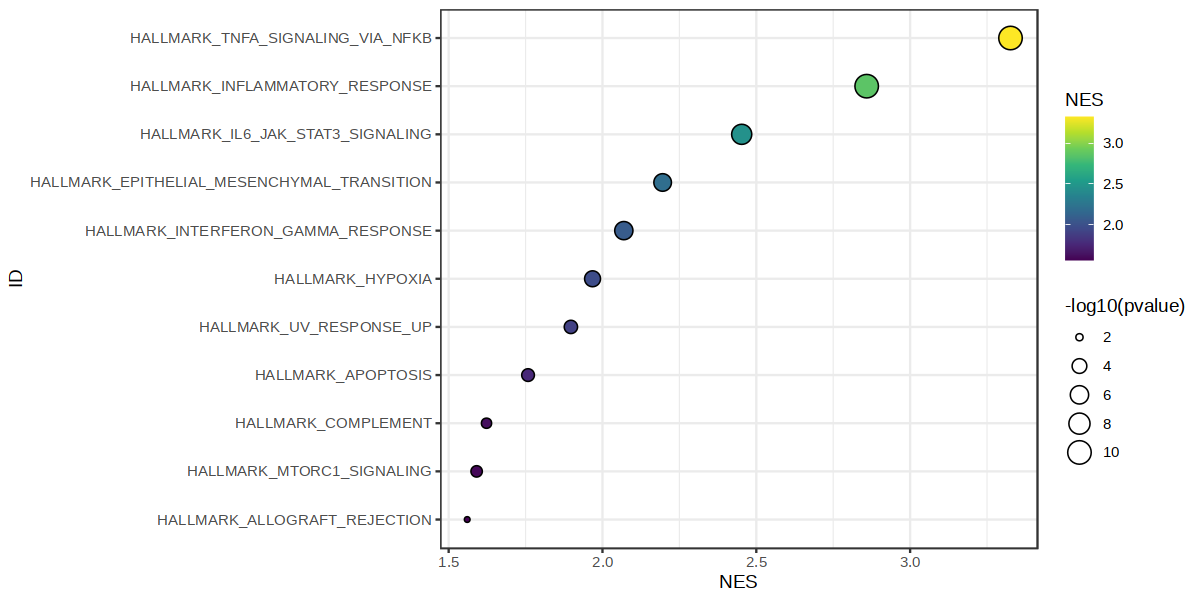

In [27]:
geneList = deg$score
names(geneList) = deg$X
library(msigdbr)
hallmark_t2g =msigdbr(species= "Homo sapiens", category = 'H')
hallmark_t2g = data.frame("TERM" = hallmark_t2g$gs_name, "GENE" = hallmark_t2g$gene_symbol)
#do an enrichment analysis on this
library(clusterProfiler)
#perform GSEA on the lupus vs not lupus signature
enrichment_result <- GSEA(geneList, TERM2GENE = hallmark_t2g)
enrichment_result = enrichment_result[order(enrichment_result$NES, decreasing= TRUE), ]
enrichment_result = enrichment_result[enrichment_result$NES > 0.5, ]
enrichment_result$ID = factor(enrichment_result$ID, levels = rev(unique(enrichment_result$ID)))
ggplot(enrichment_result, aes(y = ID, x = NES, size = -log10(pvalue), fill = NES)) + geom_point(pch=21) + 
scale_fill_gradientn(colors = viridis::viridis(10)) + theme_bw()

In [28]:
enrichment_result

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,131,0.7447560,3.326325,1.000000e-10,2.450000e-09,1.736842e-09,622,"tags=56%, list=11%, signal=51%",IL6/CXCL3/TRAF1/CXCL2/DUSP4/HBEGF/ICAM1/IER3/CXCL1/IL15RA/KDM6B/TNIP1/GCH1/TNFAIP2/PFKFB3/BIRC3/FOSB/DENND5A/MARCKS/CCND1/NFKB1/ZC3H12A/TNFAIP3/EHD1/PLAUR/NR4A2/ATF3/CCL2/FOSL1/SOD2/DUSP5/RNF19B/SAT1/NINJ1/CD83/SDC4/SLC2A3/PNRC1/CDKN1A/DNAJB4/BCL3/IRF1/PPP1R15A/SQSTM1/TRIB1/IER5/MCL1/BHLHE40/NAMPT/JAG1/NFKB2/BIRC2/JUN/NFAT5/SPSB1/ID2/BCL6/DDX58/LDLR/ZFP36/PLPP3/BTG3/IFIH1/PMEPA1/NFKBIA/MAP2K3/B4GALT1/VEGFA/CCNL1/SMAD3/JUNB/PTPRE/SPHK1/NFIL3
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,79,0.6883044,2.858812,1.000000e-10,2.450000e-09,1.736842e-09,459,"tags=35%, list=8%, signal=33%",IL6/SELE/CSF3/CXCL8/ICAM4/ITGB3/HBEGF/ICAM1/IL15RA/GCH1/IRAK2/NFKB1/PVR/PLAUR/CCL2/TNFRSF1B/SLAMF1/HRH1/TACR1/CD55/CDKN1A/IRF1/NAMPT/LDLR/HIF1A/BEST1/CD14/NFKBIA
HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,43,0.6781347,2.452571,6.044171e-08,7.404110e-07,5.248885e-07,424,"tags=30%, list=7%, signal=28%",IL6/CXCL3/ITGB3/IL2RA/CXCL1/IL15RA/TNFRSF1B/HMOX1/PTPN1/IRF1/JUN/STAT1/CD14
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,63,0.5566994,2.195567,2.893186e-06,2.362769e-05,1.675003e-05,936,"tags=54%, list=17%, signal=46%",IL6/CXCL8/ITGB3/CXCL1/PVR/TNFAIP3/PLAUR/TFPI2/LOXL2/SAT1/SDC4/JUN/ID2/CADM1/IL32/PMEPA1/DAB2/FGF2/PLOD2/VEGFA/COL4A2/ITGAV/MSX1/SFRP1/COL4A1/FSTL1/SERPINH1/MYLK/TNFRSF12A/MATN2/COPA/GJA1/TIMP1/LGALS1
HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,107,0.4779392,2.069415,1.184839e-06,1.161142e-05,8.231511e-06,623,"tags=33%, list=11%, signal=30%",IL6/ICAM1/IL15RA/MX2/GCH1/TNFAIP2/NFKB1/TNFAIP3/CCL2/SOD2/ARID5B/EPSTI1/OAS2/TRIM25/MX1/CDKN1A/PTPN1/IRF1/NAMPT/ISG15/TRIM14/DDX58/PNP/HERC6/HIF1A/STAT1/IFIH1/HELZ2/LATS2/NFKBIA/NLRC5/ZNFX1/LCP2/PLSCR1/OAS3
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,95,0.4610574,1.967739,2.502594e-05,1.751816e-04,1.241889e-04,695,"tags=34%, list=12%, signal=30%",IL6/TGFB3/IER3/PFKFB3/TNFAIP3/PLAUR/ATF3/GBE1/ETS1/SDC4/HMOX1/SLC2A3/PNRC1/CDKN1A/PPP1R15A/HSPA5/BHLHE40/EXT1/JUN/ZFP36/AKAP12/NDST1/NDRG1/SRPX/NEDD4L/VEGFA/JMJD6/NFIL3/CSRP2/NOCT/RORA/P4HA1
HALLMARK_UV_RESPONSE_UP,HALLMARK_UV_RESPONSE_UP,HALLMARK_UV_RESPONSE_UP,82,0.4558765,1.897340,3.894470e-04,2.385363e-03,1.691020e-03,580,"tags=24%, list=10%, signal=22%",IL6/CXCL2/ICAM1/GCH1/DNAJB1/FOSB/ATF3/DNAJA1/SOD2/HMOX1/IRF1/SQSTM1/STIP1/GLS/BTG3/NFKBIA/DDX21/HNRNPU/MSX1/JUNB
HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,85,0.4214073,1.758104,6.601508e-04,3.594154e-03,2.547950e-03,424,"tags=26%, list=7%, signal=24%",IL6/IER3/GCH1/BIRC3/CCND1/ATF3/DNAJA1/SOD2/SAT1/TGFB2/HMOX1/CDKN1A/CTNNB1/IRF1/SQSTM1/MCL1/JUN/HSPB1/CYLD/BTG3/PMAIP1/CD14
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,86,0.3899152,1.623061,3.527534e-03,1.571356e-02,1.113958e-02,741,"tags=26%, list=13%, signal=23%",IL6/HSPA1A/CXCL1/TNFAIP3/EHD1/PLAUR/TFPI2/DUSP5/CTSL/CD55/IRF1/HSPA5/COL4A2/CTSS/ZEB1/LCP2/BRPF3/PLSCR1/ANXA5/PRCP/CSRP1/LAP3


In [20]:
pdf("./figures/GEC_hallmarks.pdf")
ggplot(enrichment_result, aes(y = ID, x = NES, size = -log10(pvalue), fill = NES)) + geom_point(pch=21) + 
scale_fill_gradientn(colors = viridis::viridis(10)) + theme_bw()
dev.off()

png 
  2

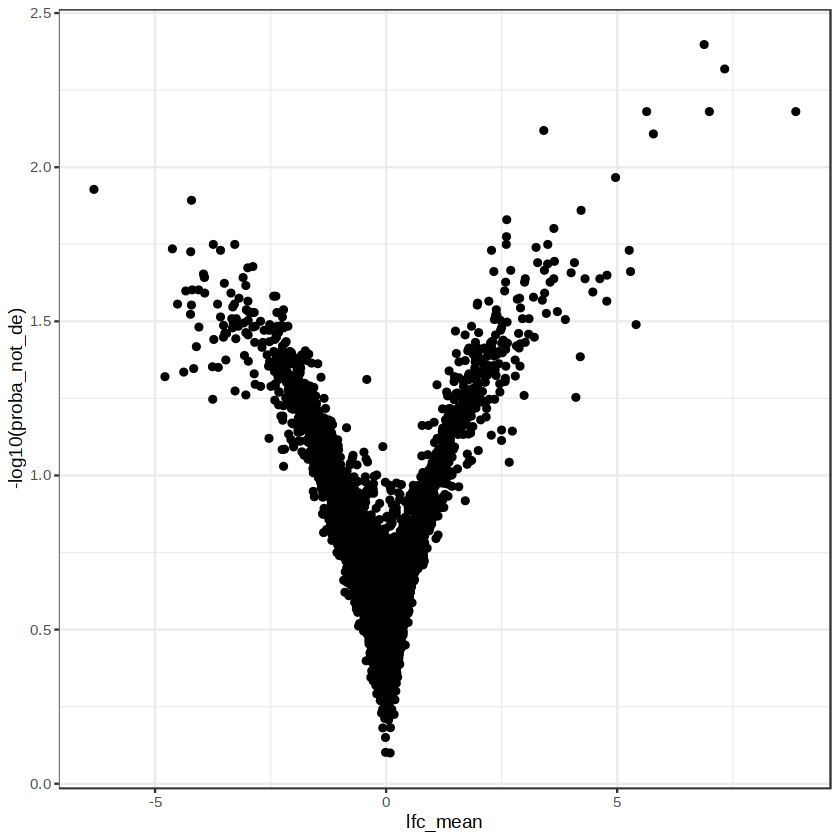

In [6]:
#do a volcano plot
ggplot(deg, aes(x = lfc_mean, y = -log10(proba_not_de))) + geom_point() + theme_bw()

In [22]:
#OR
library(org.Hs.eg.db)
ego <- gseGO(geneList     = geneList,
              OrgDb        = org.Hs.eg.db,
             ont          = "MF",
              minGSSize    = 50,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              verbose      = TRUE, keyType = 'SYMBOL')
ego = clusterProfiler::simplify(ego)

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



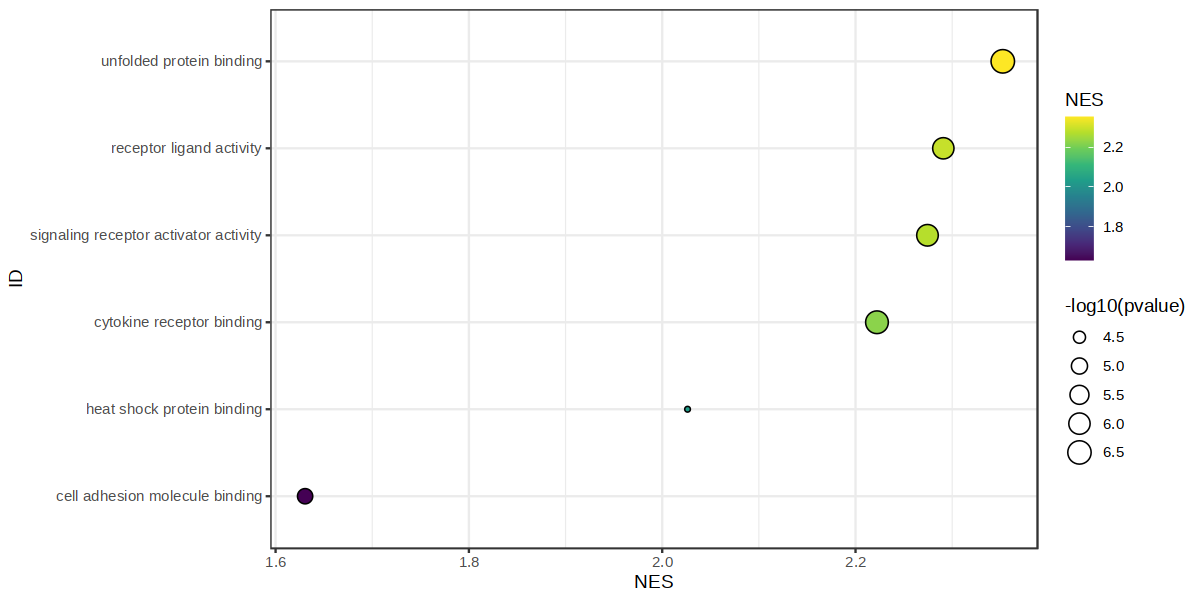

In [30]:
enrichment_result = ego@result
enrichment_result = head(enrichment_result, 10)
#order by p value and sign of the NES
enrichment_result = enrichment_result[enrichment_result$NES > 0, ] #only positive NES -  not the negative stuff
enrichment_result = enrichment_result[order(enrichment_result$NES, decreasing= TRUE), ]
enrichment_result$ID = factor(enrichment_result$Description, levels = rev(unique(enrichment_result$Description)))
options(repr.plot.width=10, repr.plot.height=5)
ggplot(enrichment_result, aes(y = ID, x = NES, size = -log10(pvalue), fill = NES)) + geom_point(pch=21) + 
scale_fill_gradientn(colors = viridis::viridis(10)) + theme_bw()

In [31]:
pdf('./figures/GEC_response_GOMF.pdf')
ggplot(enrichment_result, aes(y = ID, x = NES, size = -log10(pvalue), fill = NES)) + geom_point(pch=21) + 
scale_fill_gradientn(colors = viridis::viridis(10)) + theme_bw()
dev.off()

png 
  2

In [26]:
enrichment_result

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0051082,unfolded protein binding,unfolded protein binding,69,0.5819441,2.352354,2.905484e-07,3.688149e-05,3.207086e-05,677,"tags=36%, list=12%, signal=32%",HSPA1A/HSPA1B/HSPA6/CRYAB/HSPA8/DNAJB1/DNAJA1/DNAJA4/HSPE1/HSPD1/DNAJB4/HSPA5/HSP90AA1/ERN1/HSPB1/HSP90AB1/TMEM67/DNAJB6/ERO1B/HSP90B1/HYOU1/HSPA9/PFDN2/TCP1/SERPINH1
GO:0048018,receptor ligand activity,receptor ligand activity,61,0.5812493,2.290835,9.990264e-07,4.021081e-05,3.496593e-05,510,"tags=36%, list=9%, signal=33%",IL6/CSF3/CXCL3/CXCL8/CXCL2/HBEGF/TGFB3/CXCL1/KITLG/PDGFA/SEMA3A/CCL2/TGFB2/SEMA7A/SEMA4C/NAMPT/JAG1/IL32/FGF2/CDC42EP2/VEGFA/CCL23
GO:0030546,signaling receptor activator activity,signaling receptor activator activity,65,0.5707382,2.274443,8.704157e-07,4.021081e-05,3.496593e-05,510,"tags=34%, list=9%, signal=31%",IL6/CSF3/CXCL3/CXCL8/CXCL2/HBEGF/TGFB3/CXCL1/KITLG/PDGFA/SEMA3A/CCL2/TGFB2/SEMA7A/SEMA4C/NAMPT/JAG1/IL32/FGF2/CDC42EP2/VEGFA/CCL23
GO:0005126,cytokine receptor binding,cytokine receptor binding,78,0.5410171,2.222185,4.581552e-07,3.688149e-05,3.207086e-05,380,"tags=23%, list=7%, signal=22%",IL6/CSF3/CXCL3/CXCL8/TRAF1/CXCL2/ITGB3/TGFB3/CXCL1/KITLG/LRG1/CCL2/NES/TGFB2/LIFR/TRAF3/STAT1/SDCBP
GO:0031072,heat shock protein binding,heat shock protein binding,64,0.5107741,2.026219,6.313554e-05,1.129425e-03,9.821084e-04,422,"tags=27%, list=7%, signal=25%",HSPA1A/HSPA1B/HSPA6/HSPA8/DNAJB1/DNAJA1/DNAJA4/HSPA5/STIP1/ERN1/HSP90AB1/CHORDC1/ZFP36/HIF1A/AHSA1/DNAJB6/DNAJB9
GO:0050839,cell adhesion molecule binding,cell adhesion molecule binding,274,0.3364432,1.630548,1.330209e-05,3.059480e-04,2.660417e-04,775,"tags=21%, list=14%, signal=19%",CD200/ICAM4/HSPA1A/ITGB3/ICAM1/MB21D2/HSPA8/GPRC5A/PHLDB2/DNAJB1/BAG3/PVR/EHD1/ITGA9/KIRREL1/JAM3/FLNB/NINJ1/TRIM25/IZUMO1/SEMA7A/CTNNB1/PTPN1/HSPA5/ISG15/SND1/HSP90AB1/CADM1/AHSA1/PLPP3/CEMIP2/NDRG1/STAT1/SDCBP/ZC3HAV1/FGF2/AFDN/ITGAV/MSN/TBC1D10A/NUMB/ANXA1/SNX9/CTNNAL1/ASAP1/RANGAP1/FER/EIF5/CHMP4B/DDX3X/BMPR2/ERC1/EPHA2/PICALM/VCL/MICALL1/FSCN1
